In [9]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('dataset.csv')

In [11]:
df.shape

(1467832, 63)

In [12]:
df.head(10)

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
5,2.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
6,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
7,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
8,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
9,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_38,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0


In [13]:
df.columns.values

array(['total_sessions_day0', 'total_sessions_day1',
       'total_sessions_day3', 'total_sessions_day7',
       'chapters_finished_day0', 'chapters_finished_day1',
       'chapters_finished_day3', 'chapters_finished_day7',
       'chapters_opened_day0', 'chapters_opened_day1',
       'chapters_opened_day3', 'chapters_opened_day7',
       'chapters_closed_day0', 'chapters_closed_day1',
       'chapters_closed_day3', 'chapters_closed_day7',
       'diamonds_received_day0', 'diamonds_received_day1',
       'diamonds_received_day3', 'diamonds_received_day7',
       'diamonds_spent_day0', 'diamonds_spent_day1',
       'diamonds_spent_day3', 'diamonds_spent_day7', 'tickets_spent_day0',
       'tickets_spent_day1', 'tickets_spent_day3', 'tickets_spent_day7',
       'retained_day1', 'retained_day3', 'retained_day7',
       'chapters_finished_session1', 'chapters_finished_session3',
       'chapters_finished_session9', 'chapters_opened_session1',
       'chapters_opened_session3', 'chapters_op

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [15]:
df.describe()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,app_iap_ltv_day0,app_iap_ltv_day1,app_iap_ltv_day3,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
count,1.466467e+06,1.466465e+06,1.466464e+06,1.466458e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,...,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06,1.467832e+06
mean,1.847298e+00,2.193912e+00,2.608979e+00,3.113484e+00,1.234763e+00,1.498150e+00,1.772233e+00,2.055170e+00,2.099693e+00,2.382293e+00,...,1.022759e-01,1.261447e-01,1.496395e-01,8.968177e-03,1.090574e-02,1.325368e-02,2.203037e-02,2.139268e-01,2.091572e-02,2.568728e-01
std,2.530825e+00,3.621980e+00,5.347342e+00,7.888102e+00,3.048333e+00,3.975010e+00,5.033945e+00,6.325564e+00,3.117375e+00,4.077269e+00,...,7.672101e-01,9.683484e-01,1.176394e+00,4.453546e-02,6.009280e-02,7.472105e-02,3.088758e-01,2.097916e+00,1.601929e-01,2.274466e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.829604e+00,0.000000e+00,0.000000e+00,-2.777195e+00
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.710000e+02,7.710000e+02,7.710000e+02,9.050000e+02,7.300000e+01,3.590000e+02,3.600000e+02,3.600000e+02,7.700000e+01,3.600000e+02,...,4.621191e+01,1.391509e+02,1.391509e+02,3.782356e+00,1.974900e+01,1.997062e+01,4.545741e+01,2.687878e+02,3.393084e+01,2.720042e+02


In [16]:
df.isnull().sum()


total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64

In [17]:
df = df.fillna(0)
df.isnull().sum().sum()

0

In [18]:
df.describe(include=[object])

,media_source,install_date,country_code,platform
count,1467832,1467832,1467832,1467832
unique,24,62,224,2
top,SOURCE_4,2021-12-30,COUNTRY_141,android
freq,728958,94101,387761,887426


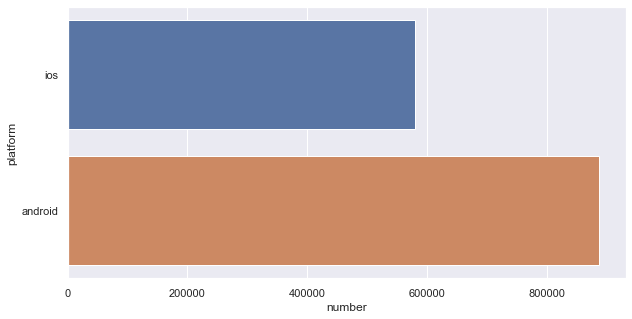

In [29]:
sns.set_theme()
plt.figure(figsize = (10, 5))
sns.countplot(y='platform',data=df)
plt.xlabel('number')
plt.ylabel('platform')
plt.show()

In [30]:
!pip install category_encoders
from category_encoders.binary import BinaryEncoder

     ---------------------------------------- 69.1/69.1 KB 1.3 MB/s eta 0:00:00
     -------------------------------------- 233.7/233.7 KB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 9.1/9.1 MB 21.6 MB/s eta 0:00:00


You should consider upgrading via the 'c:\users\iliya\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [32]:
import copy
cat_vars = ["media_source", "install_date",  "country_code",  "platform"]
bn = BinaryEncoder()
df_oh = copy.deepcopy(df)
bn.fit_transform(df_oh.values)[cat_vars]
df_oh.head()

<Figure size 720x360 with 0 Axes>

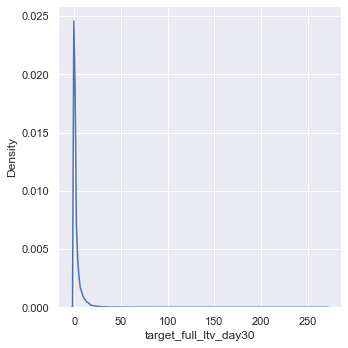

In [21]:
plt.figure(figsize=(10,5))
sns.displot(data = df, x = 'target_full_ltv_day30', kind="kde")
plt.show()

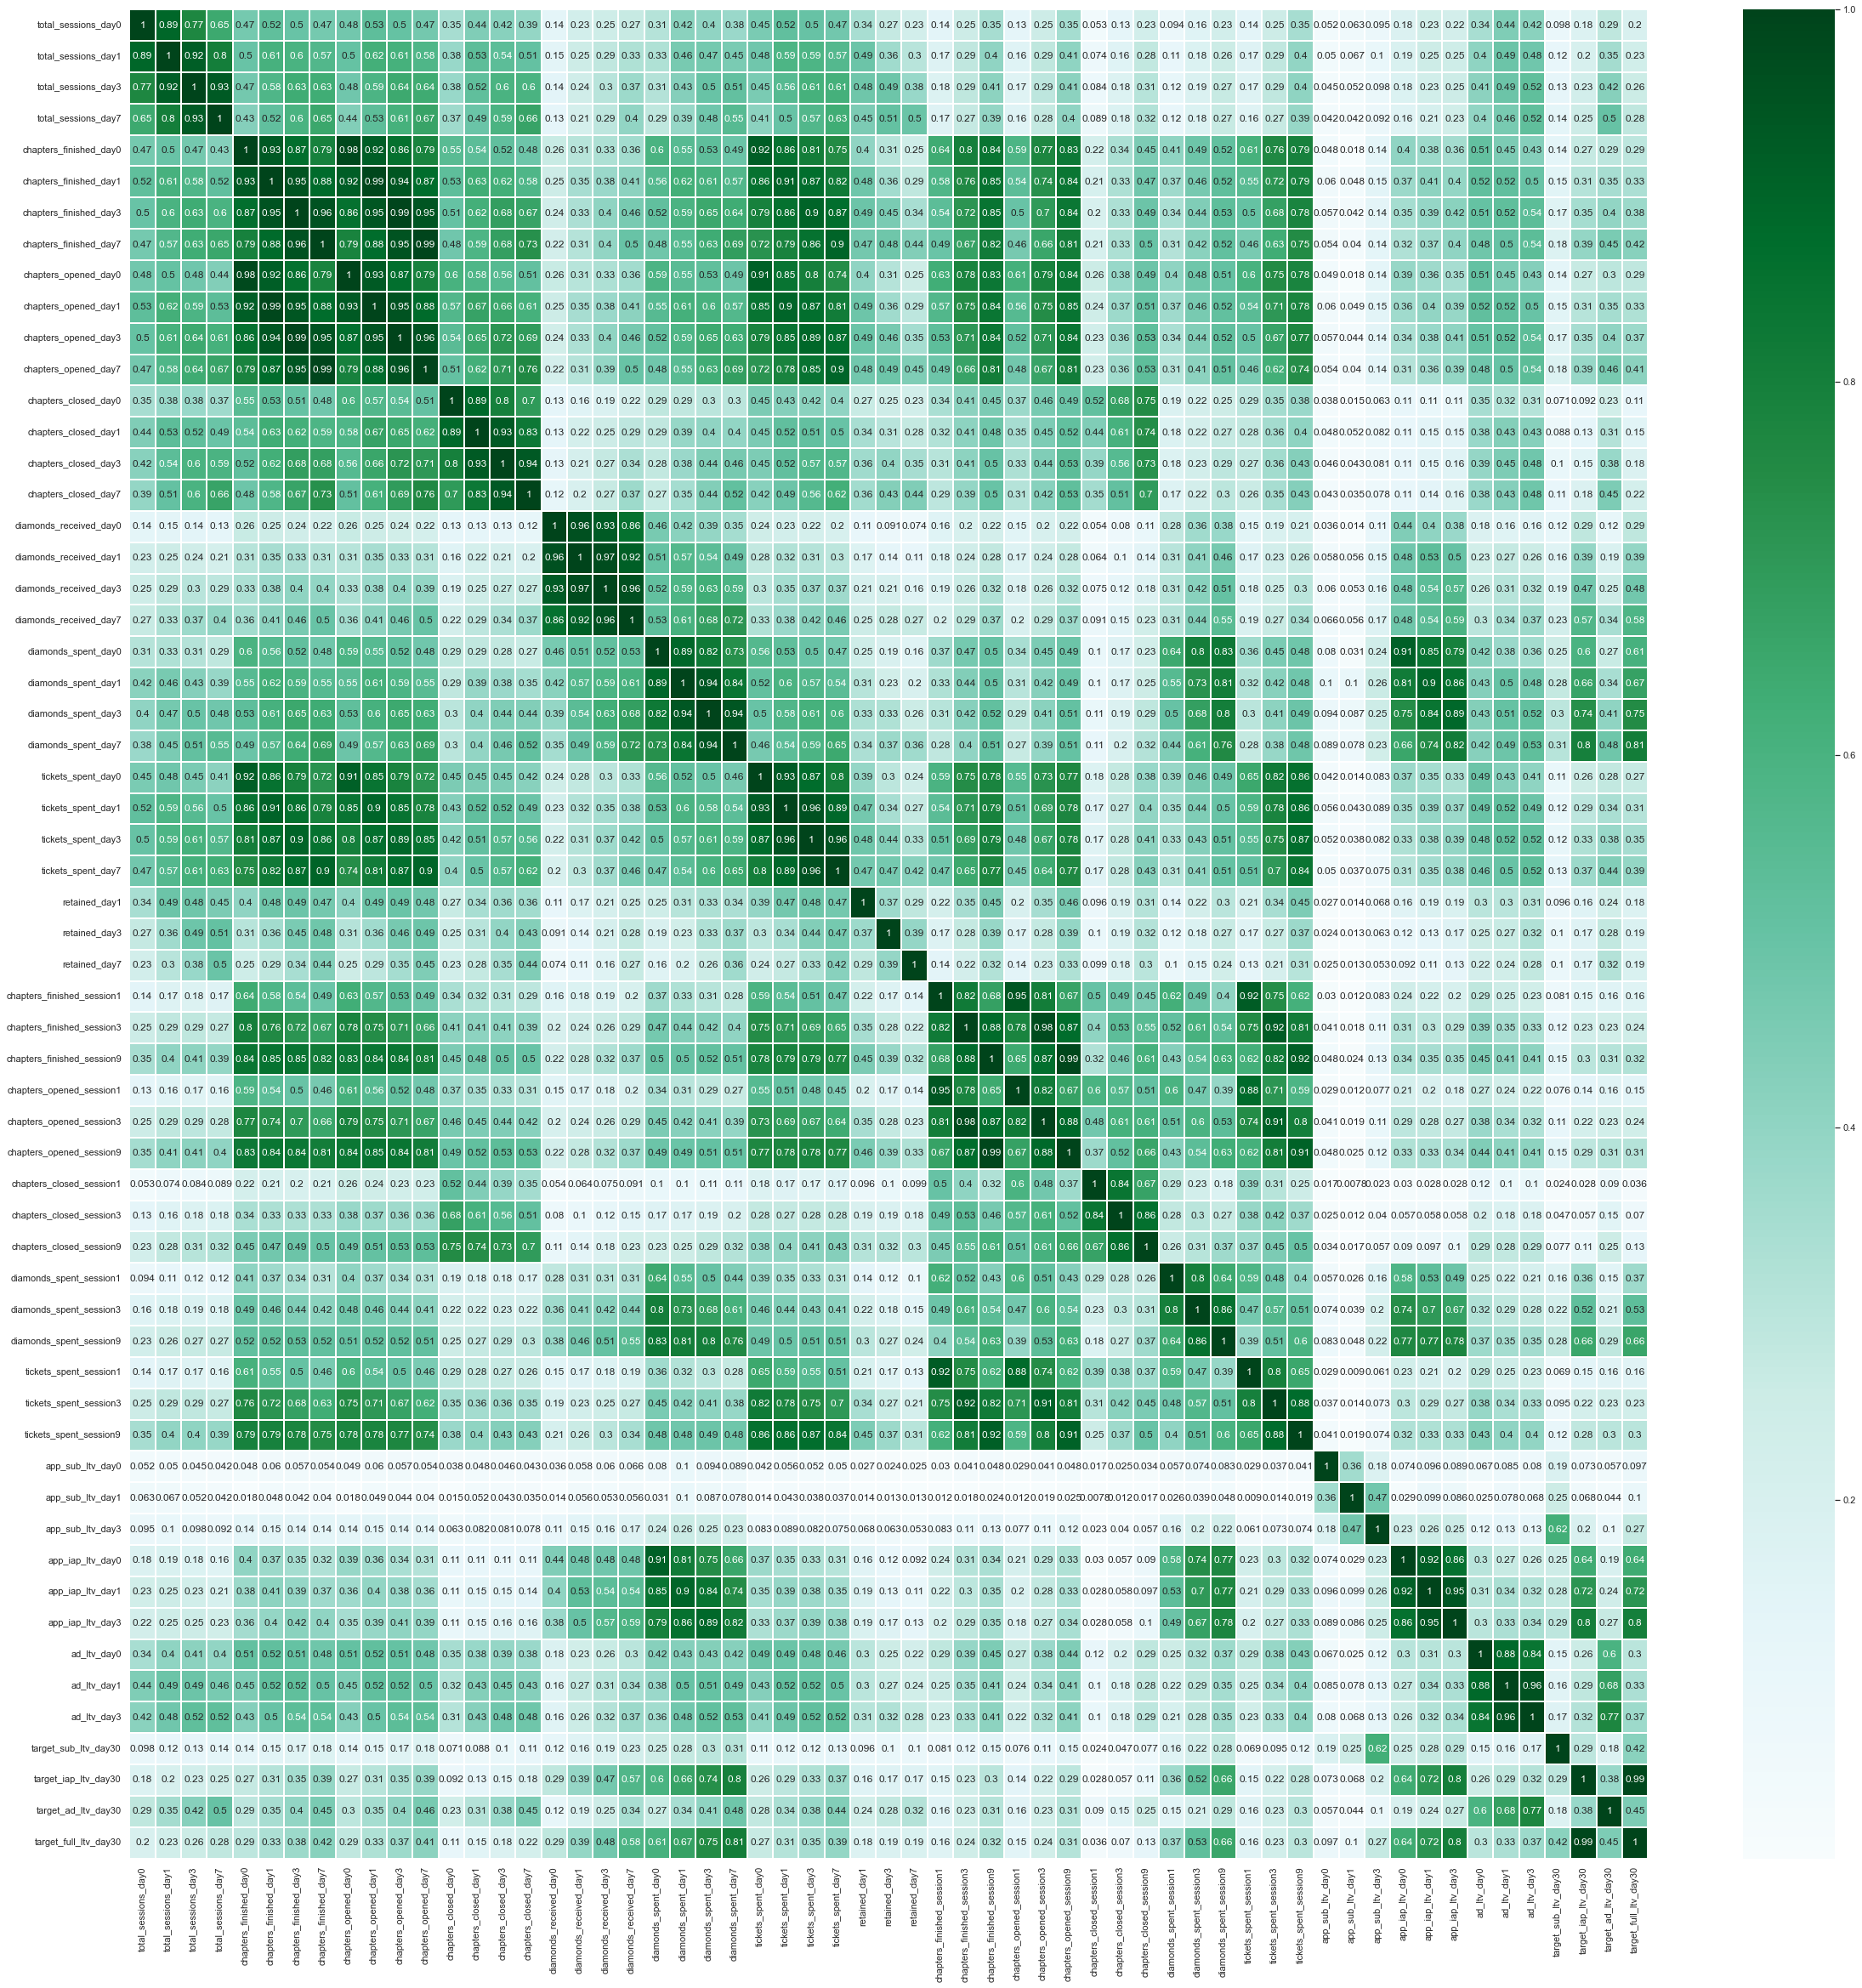

In [22]:
plt.figure(figsize=(40,40))
sns.heatmap(df.corr(), cmap = 'BuGn', linewidth =.005, annot = True)
plt.show()

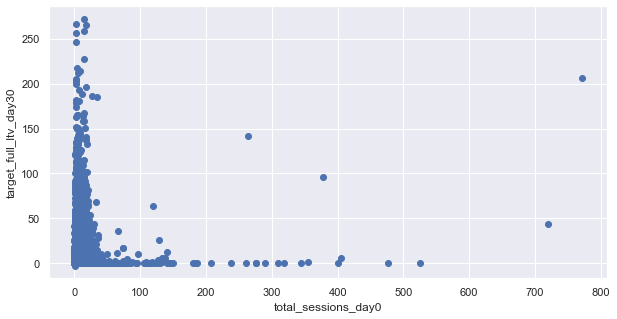

In [23]:
plt.figure(figsize = (10,5))
plt.scatter(df["total_sessions_day0"], df['target_full_ltv_day30'] )
plt.ylabel('target_full_ltv_day30')
plt.xlabel("total_sessions_day0")
plt.show()

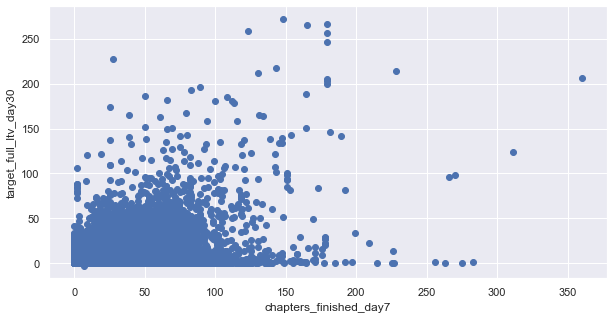

In [24]:
plt.figure(figsize = (10,5))
plt.scatter(df["chapters_finished_day7"], df['target_full_ltv_day30'] )
plt.ylabel('target_full_ltv_day30')
plt.xlabel("chapters_finished_day7")
plt.show()

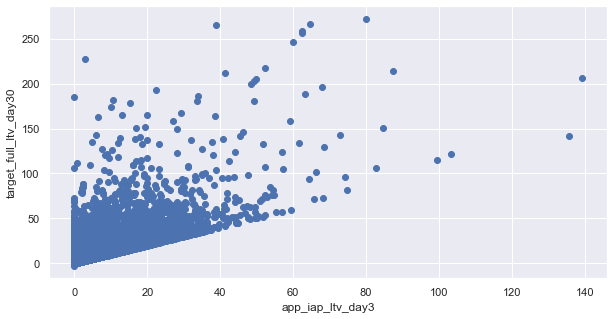

In [25]:
plt.figure(figsize = (10,5))
plt.scatter(df["app_iap_ltv_day3"], df['target_full_ltv_day30'] )
plt.ylabel('target_full_ltv_day30')
plt.xlabel("app_iap_ltv_day3")
plt.show()

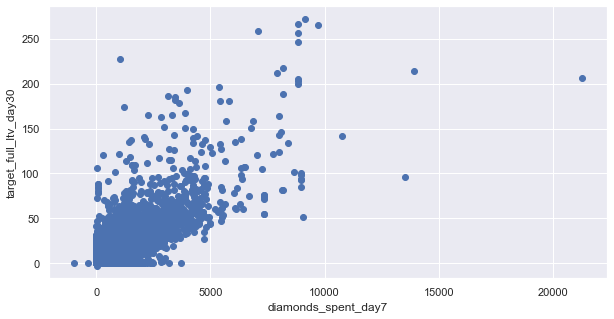

In [26]:
plt.figure(figsize = (10,5))
plt.scatter(df["diamonds_spent_day7"], df['target_full_ltv_day30'] )
plt.ylabel('target_full_ltv_day30')
plt.xlabel("diamonds_spent_day7")
plt.show()

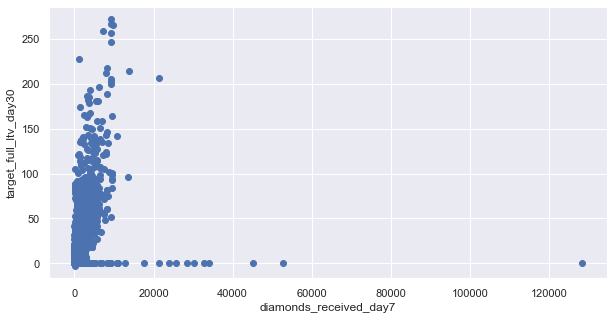

In [27]:
plt.figure(figsize = (10,5))
plt.scatter(df["diamonds_received_day7"], df['target_full_ltv_day30'] )
plt.ylabel('target_full_ltv_day30')
plt.xlabel("diamonds_received_day7")
plt.show()